<a href="https://colab.research.google.com/github/FGalvao77/Arvores-e-Ensembles-de-Machine-Learning-Scikit-learn-/blob/main/%C3%81rvores_e_Ensembles_de_Machine_Learning_(Scikit_learn%2B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Árvores e Ensembles de Machine Learning (Scikit-learn+)**

---



Vamos entender como funciona as `árvores de decisão` e, como melhor utilizá-las `tunando` alguns parâmetros.

### **Decision Trees na Prática (Scikit-learn / Python)**




- [Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontree#sklearn.tree.DecisionTreeRegressor)

**Importando as bibliotecas**

In [ ]:
# bibliotecas necessárias
import pandas as pd     # para modelagem de dados                 
import numpy as np      # para modelagem matemática

# para auxiliar visualização gráfica
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Carregando o conjunto de dados**

In [ ]:
# importando o conjunto de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

**Análise exploratória do conjunto de dados**

In [ ]:
# visualizando as 5 primeiras linhas
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# dimensão do conjunto de dados
data.shape      # linhas e colunas

(17000, 9)

In [ ]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
# contabilizando as instâncias únicas dos atributos
data.nunique()

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

In [ ]:
# contabilizando as frequências das instâncias únicas do atributo alvo
data['median_house_value'].value_counts().head(20)  # as 20 primeiras instâncias

500001.0    814
137500.0     95
162500.0     89
112500.0     85
187500.0     74
225000.0     73
87500.0      64
350000.0     64
150000.0     52
67500.0      51
275000.0     51
175000.0     49
100000.0     48
125000.0     45
250000.0     39
200000.0     37
118800.0     35
450000.0     29
300000.0     28
193800.0     27
Name: median_house_value, dtype: int64

**Pré-processamento dos dados**

In [ ]:
# importando as bibliotecas
from sklearn.tree import DecisionTreeRegressor, plot_tree   # modelo de árvore de decisão - regressão e visualização da árvore
from sklearn.model_selection import train_test_split        # para particionamento dos dados - treino e validação
from sklearn.metrics import mean_squared_error              # métrica de avalição do modelo - erro média quadrático

In [ ]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [ ]:
# particionando os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  train_size=0.6,   # 60% para treino e, o restante 40% para validação do modelo
                                                  random_state=42)  # parâmetro de repetibilidade

In [ ]:
# dimensão dos particionamento dos dados
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10200, 8), (6800, 8), (10200,), (6800,))

**Aplicando o modelo de árvore de decisão**

Segue as etapas:
- aplicar um modelo básico (baseline);
- realizar as predições;
- avaliar e,
- por fim, visualizar a árvore graficamente.

E a partir do modelo `baseline`, iremos tentar melhor a perfomance do modelo aumentando a sua profundidade e, avaliando o resultado e, assim sucessivamente até encontrar o modelo "ideal". 

In [ ]:
# começaremos com profundidade de 2 níveis (max_depth=2) e o parâmetro de repetibilidade (random_state=42)
dec_tree1 = DecisionTreeRegressor(max_depth=2, random_state=42) 
dec_tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# realizando as predições com o modelo nos dados de validação
pred = dec_tree1.predict(X_val)
pred[:10]   # visualizando as 10 primeiras predições

array([218709.71251129, 432569.3537415 , 138258.46534422, 218709.71251129,
       138258.46534422, 218709.71251129, 138258.46534422, 138258.46534422,
       316320.32703003, 218709.71251129])

In [ ]:
# visualizando o erro médio quadrático das predições VS dados de y_val
np.sqrt(mean_squared_error(pred, y_val))

87325.93595519461

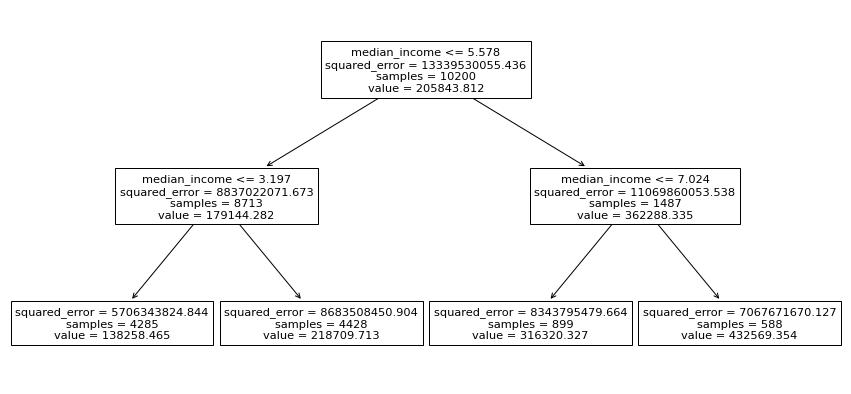

In [ ]:
# plotando a árvore com dois níveis de profundidade
pylab.figure(figsize=[15, 7])   # tamanho da figura
plot_tree(dec_tree1, feature_names=X_train.columns);     # modelo e exibindo o nome dos atributos

In [ ]:
# modelo com três níveis de profundidade e visualizando o resultado
dec_tree2 = DecisionTreeRegressor(max_depth=3, random_state=42)
dec_tree2.fit(X_train, y_train)

pred = dec_tree2.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

83615.03102765353

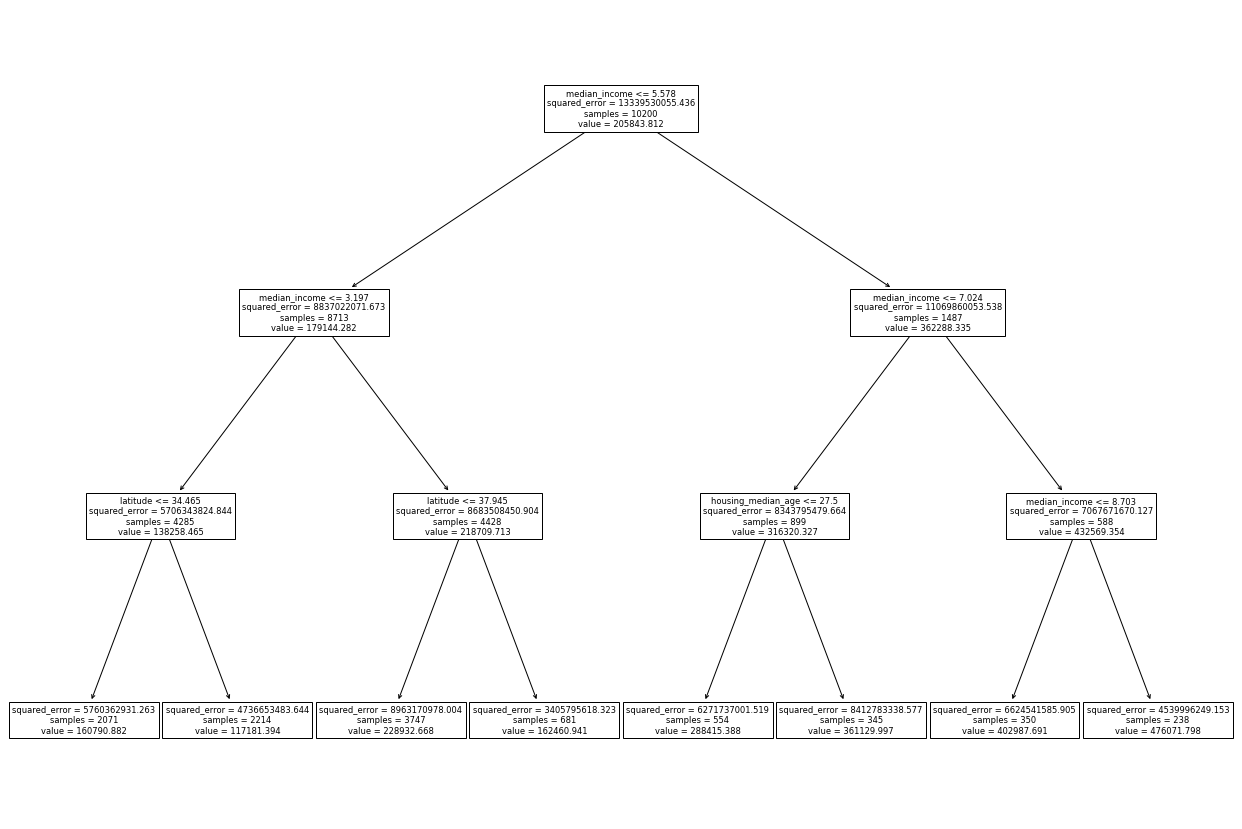

In [ ]:
# plotando a árvore com três níveis de profundidade
pylab.figure(figsize=[22, 15])   # tamanho da figura
plot_tree(dec_tree2, feature_names=X_train.columns);     # modelo e exibindo o nome dos atributos

In [ ]:
# modelo com cinco níveis de profundidade e visualizando o resultado
dec_tree3 = DecisionTreeRegressor(max_depth=5, random_state=42)
dec_tree3.fit(X_train, y_train)

pred = dec_tree3.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

74357.49876918188

> A partir desta árvore, não irei mais plotar a visualização gráfica. Já que a figura se torna imensa e, teremos dificuldades em visualizar a árvore.

In [ ]:
# modelo com oito níveis de profundidade e visualizando o resultado
dec_tree4 = DecisionTreeRegressor(max_depth=8, random_state=42)
dec_tree4.fit(X_train, y_train)

pred = dec_tree4.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

63421.08420351452

In [ ]:
# modelo com onze níveis de profundidade e visualizando o resultado
dec_tree5 = DecisionTreeRegressor(max_depth=11, random_state=42)
dec_tree5.fit(X_train, y_train)

pred = dec_tree5.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

64449.86217538393

In [ ]:
# modelo com treze níveis de profundidade e visualizando o resultado
dec_tree6 = DecisionTreeRegressor(max_depth=13, random_state=42)
dec_tree6.fit(X_train, y_train)

pred = dec_tree6.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

65813.92356467734

> Veja que, a última árvore com 13 níveis foi pior que a anterior de 11 e essa também foi pior que com 8 níveis, pórem essa foi melhor que anterior de 5 níveis de profundidade.

Portanto temos o melhor modelo com `max_depth=8`.

Vamos explorar outro parâmetro o `min_samples_leaf` que entrega resultados interessantes.
- esse parâmetro garante o mínimo de amostras em cada folha/nó.

In [ ]:
# modelo com uma amostra em cada folha/nó e visualizando o resultado
dec_tree7 = DecisionTreeRegressor(min_samples_leaf=1, random_state=42)
dec_tree7.fit(X_train, y_train)

pred = dec_tree7.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

68593.11022262968

In [ ]:
# modelo com duas amostras em cada folha/nó e visualizando o resultado
dec_tree8 = DecisionTreeRegressor(min_samples_leaf=2, random_state=42)
dec_tree8.fit(X_train, y_train)

pred = dec_tree8.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

64884.91787320764

In [ ]:
# modelo com três amostras em cada folha/nó e visualizando o resultado
dec_tree9 = DecisionTreeRegressor(min_samples_leaf=3, random_state=42)
dec_tree9.fit(X_train, y_train)

pred = dec_tree9.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

63318.65702031331

In [ ]:
# modelo com cinco amostras em cada folha/nó e visualizando o resultado
dec_tree10 = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
dec_tree10.fit(X_train, y_train)

pred = dec_tree10.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

61141.37932304896

In [ ]:
# modelo com oito amostras em cada folha/nó e visualizando o resultado
dec_tree11 = DecisionTreeRegressor(min_samples_leaf=8, random_state=42)
dec_tree11.fit(X_train, y_train)

pred = dec_tree11.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

59527.870120792744

In [ ]:
# modelo com nove amostras em cada folha/nó e visualizando o resultado
dec_tree12 = DecisionTreeRegressor(min_samples_leaf=9, random_state=42)
dec_tree12.fit(X_train, y_train)

pred = dec_tree12.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

58615.36699284045

In [ ]:
# modelo com treze amostras em cada folha/nó e visualizando o resultado
dec_tree13 = DecisionTreeRegressor(min_samples_leaf=13, random_state=42)
dec_tree13.fit(X_train, y_train)

pred = dec_tree13.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

58485.128764780784

In [ ]:
# modelo com quinze amostras em cada folha/nó e visualizando o resultado
dec_tree14 = DecisionTreeRegressor(min_samples_leaf=15, random_state=42)
dec_tree14.fit(X_train, y_train)

pred = dec_tree14.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

58591.680092659466

In [ ]:
# modelo com dezessete amostras em cada folha/nó e visualizando o resultado
dec_tree15 = DecisionTreeRegressor(min_samples_leaf=17, random_state=42)
dec_tree15.fit(X_train, y_train)

pred = dec_tree15.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

58564.232904784345

> Com essa estratégia a árvore com `min_samples_leaf=13`, obteve o melhor **erro médio quadrático**.
- e quanto menor o erro, melhor é o modelo.

Agora vamos conhecer um algoritmo que gera uma "floresta" com várias árvores.

### **Random Forest na Prática (Scikit-learn / Python)**

> Uma floresta aleatória é um metaestimador que ajusta várias árvores de decisão de classificação em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle. O tamanho da subamostra é controlado com o parâmetro `max_samples` e `bootstrap=True(padrão)`, caso contrário, todo o conjunto de dados é usado para construir cada árvore.

- [Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

**Importando as bibliotecas**

In [ ]:
# importando as bibliotecas
from sklearn.ensemble import RandomForestRegressor

> [Paper original](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)

**Aplicando o modelo de floresta randômica**

In [ ]:
# instanciando o modelo com os argumentos fixando a aleatoriedade (random_state=42) 
# e "n_jobs=-1" - número de trabalhos a serem executados em paralelo (-1 significa usar todos os processadores)
rand_for1 = RandomForestRegressor(random_state=42, n_jobs=-1)
# treinando o modelo
rand_for1.fit(X_train, y_train)

# realizando as prediçẽos e calculando o erro médio quadrático
pred = rand_for1.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50348.64018905848

Vamos passar como argumento o `n_estimators=150`, onúmero de árvores na floresta.

In [ ]:
# instanciando o modelo com "n_estimators=150" e avaliando o resultado
rand_for2 = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
rand_for2.fit(X_train, y_train)

pred = rand_for2.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50226.91965694783

In [ ]:
# instanciando o modelo com "n_estimators=300" e avaliando o resultado
rand_for3 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rand_for3.fit(X_train, y_train)

pred = rand_for3.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50172.520640367205

In [ ]:
# instanciando o modelo com "n_estimators=500" e avaliando o resultado
rand_for4 = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
rand_for4.fit(X_train, y_train)

pred = rand_for4.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50161.023544301366

In [ ]:
# instanciando o modelo com "n_estimators=700" e avaliando o resultado
rand_for5 = RandomForestRegressor(n_estimators=700, random_state=42, n_jobs=-1)
rand_for5.fit(X_train, y_train)

pred = rand_for5.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50093.896672030445

In [ ]:
# instanciando o modelo com "n_estimators=1000" e avaliando o resultado
rand_for6 = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rand_for6.fit(X_train, y_train)

pred = rand_for6.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50086.130394589476

In [ ]:
# instanciando o modelo com "n_estimators=1500" e avaliando o resultado
rand_for7 = RandomForestRegressor(n_estimators=1500, random_state=42, n_jobs=-1)
rand_for7.fit(X_train, y_train)

pred = rand_for7.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50089.21625241292

> O modelo com `n_estimators=1000` obteve o melhor resultado.

Vamos usar outro argumento importante que traz resultado interessante, o `min_samples_leaf`.
- número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos minimod de amostras (`min_samples_leaf`) de treinamento em cada um dos ramos esquerdo e direito. Isso pode ter o efeito de suavizar o modelo, especialmente na regressão.

In [ ]:
# instanciando o modelo com "n_estimators=300", "min_samples_leaf=2", "random_state=42", "n_jobs=-1" e avaliando o resultado
rand_for8 = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, random_state=42, n_jobs=-1)
rand_for8.fit(X_train, y_train)

pred = rand_for8.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50029.258355781334

> Veja que este modelo foi melhor que o modelo com `n_estimators=1000`, simplesmente utilizando o argumento `min_samples_leaf=2` e reduzindo o `n_estimators=300`. 

Pórem vamos tentar encontrar os melhores parâmetros para o modelo.

In [ ]:
# instanciando o modelo com "n_estimators=100", "min_samples_leaf=2", "random_state=42", "n_jobs=-1" e avaliando o resultado
rand_for9 = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, random_state=42, n_jobs=-1)
rand_for9.fit(X_train, y_train)

pred = rand_for9.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50108.259231617885

In [ ]:
# instanciando o modelo com "n_estimators=300", "min_samples_leaf=3", "random_state=42", "n_jobs=-1" e avaliando o resultado
rand_for10 = RandomForestRegressor(n_estimators=300, min_samples_leaf=3, random_state=42, n_jobs=-1)
rand_for10.fit(X_train, y_train)

pred = rand_for10.predict(X_val)
np.sqrt(mean_squared_error(y_val, pred))

50206.29157369528

> O modelo com parâmetros de  "n_estimators=300", "min_samples_leaf=2", "random_state=42", "n_jobs=-1", obteve o melhor resultado.

### **Bônus - árvore de decisão ajustada manualmente**

In [ ]:
# importando as bibliotecas
import pydot
import graphviz

from sklearn.tree import export_graphviz

In [ ]:
# importando as funções
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# instanciando as variáveis explicativas (X) e a resposta (y)
X, y = data.drop('median_house_value',axis=1), data['median_house_value']

# instanciando os rótulos
features_label = data.drop('median_house_value',
                           axis=1).columns

# # instanciando as classes
# class_label = ['0','1']

# criando uma função para os parâmetros da árvore e seu estimador
'''
Segue os parâmetros:
 - critério;
 - divisão;
 - profundidade;
 - mínimo das amostras da divisão e,
 - mínimo das amostras da folha.
'''
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeRegressor(
        random_state = 42,
        criterion = crit,
        splitter = split,
        max_depth = depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # aplicando o treinamento do estimador nas variáveis X e y
    estimator.fit(X, y)
    
    # instanciando objeto gráfico
    graph = Source(export_graphviz(estimator,
                                   out_file=None,
                                   feature_names=features_label,
                                #    class_names=class_label,
                                   impurity=True, 
                                   filled = True))
    display(SVG(graph.pipe(format='svg')))

    # retornando o estimador
    return estimator

# definindo os parâmetros do objeto gráfico
inter=interactive(plot_tree, 
                  crit = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
                  split = ['best', 'random'], 
                  depth=[1,2,3,4,5,10,20,30], 
                  min_samples_split=(1,15), 
                  min_samples_leaf=(1,15))

# visualizando o objeto gráfico
display(inter);

interactive(children=(Dropdown(description='crit', options=('squared_error', 'friedman_mse', 'absolute_error',…

### **Vídeo-aula:**
- [Mario Filho](https://www.youtube.com/playlist?list=PLwnip85KhroUBuVfAEUz4jE5ejQ5vXf6N)